# Student performance in exams
## Plotting with seaborn and discussing meritocracy

## 0) Problem description and looking at the big picture

One of the biggest discussions nowadays is about meritocracy and how your own effort leads you to success. On the other hand, this raises a deeper and harder discussion on where we start on the journey of life. It's really hard to think that someone born in a favela will have the same opportunities as the son of a successful salesman that doesn't have to worry with getting a job and helping his family paying the bills.

## 1) Imports and general definitions

As usual, we start by importing the libraries and changing the default path folder to the root

In [1]:
# Standand libraries for DS
import matplotlib.pyplot as plt
import pandas as pd
import requests

# Plotting
import seaborn as sns

# Data prep
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

In [2]:
# Changing working directory
os.chdir("../")

In [3]:
# Folders path
paths = {
    "data": "0-data\\",
    "pipeline": "2-pipeline\\",
    "output": "3-output\\"
}

# Random state
seed = 42

## 2) Data description

Bear in mind that this is a small and fictional dataset, our goal is only to do some data exploration and feature engineering. My original idea was to use a classification algorithm and train it to predict the student characteristics based on the grades, to show have a wider discussion on machine learning "hidden biases", but as I said, the data is fictional and, hence, too "clean". So, let's learn how to explore our data with plots with *seaborn*!

This dataset consists of test results and background information about thousands of students, including:

* Gender;
* Race/ethnicity;
* Parental level of education;
* Lunch: if the student chose free/reduced lunch or the regular to take during the test;
* Test preparation;

It was acquired from [kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams) and you can download the full code at my [github repository](https://github.com/rafaelbg27/kaggle-student-performance-in-exams)

In [4]:
# Reading data
db_raw = pd.read_csv(paths["data"] + "students-performance.csv")
db_raw.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Changing columns name to snake_case
db_raw.rename(columns={"race/ethnicity": "ethnicity",
    "parental level of education": "parental_education",
    "test preparation course": "test_preparation",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"}, inplace=True)

db_raw = db_raw.loc[(db_raw["math_score"] >= 20) & (db_raw["reading_score"] >= 20) & (db_raw["writing_score"] >= 20)]
db_raw = db_raw.dropna()
db_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              994 non-null    object
 1   ethnicity           994 non-null    object
 2   parental_education  994 non-null    object
 3   lunch               994 non-null    object
 4   test_preparation    994 non-null    object
 5   math_score          994 non-null    int64 
 6   reading_score       994 non-null    int64 
 7   writing_score       994 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 69.9+ KB


## 3) Data exploring and insights

Now that we’ve imported the data, we can round the grades to have less bars on the bar plots and make the visualization easier.

In [6]:
db = db_raw.copy()

for column in ["math_score", "reading_score", "writing_score"]: 
    
    category = pd.cut(db[column],bins=[20, 30, 40, 50, 60, 70, 80, 90, 100], 
    labels=[30, 40, 50, 60, 70, 80, 90, 100])

    db.drop(column, axis=1, inplace=True)
    db.insert(len(db.columns), column, category)

db.head(10)

,gender,ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,80,80,80
1,female,group C,some college,standard,completed,70,90,90
2,female,group B,master's degree,standard,none,90,100,100
3,male,group A,associate's degree,free/reduced,none,50,60,50
4,male,group C,some college,standard,none,80,80,80
5,female,group B,associate's degree,standard,none,80,90,80
6,female,group B,some college,standard,completed,90,100,100
7,male,group B,some college,free/reduced,none,40,50,40
8,male,group D,high school,free/reduced,completed,70,70,70
9,female,group B,high school,free/reduced,none,40,60,50


We will make a bar chart for each variable, as a very basic data exploring, but we can take several conclusions from each one of them.

As all plots follow the same pattern of code, let's create a code to make things easier to read and understand.

In [7]:
def plot_barchart(feature, xlabel):
    fig = plt.figure(figsize=(14,10))
    plt.title(f'Score by {xlabel}', fontsize=17)

    # math
    ax1 = plt.subplot(311)
    ax1 = sns.countplot(data=db, x=feature, hue='math_score', 
        palette='husl', order = db[feature].value_counts(ascending=False).index)
    plt.legend([])
    ax1.set_ylabel('Math Score', fontsize=12)
    ax1.set_xlabel('', fontsize=12)
    plt.setp(ax1.get_xticklabels(), visible=False)

    # reading
    ax2 = plt.subplot(312, sharex=ax1)
    ax2 = sns.countplot(data=db, x=feature, hue='reading_score', 
        palette='husl', order = db[feature].value_counts(ascending=False).index)
    plt.legend([])
    ax2.set_ylabel('Reading Score', fontsize=12)
    ax2.set_xlabel('', fontsize=12)
    plt.setp(ax2.get_xticklabels(), visible=False)

    # writing
    ax3 = plt.subplot(313, sharex=ax1)
    ax3 = sns.countplot(data=db, x=feature, hue='writing_score', 
        palette='husl', order = db[feature].value_counts(ascending=False).index)
    plt.legend([])
    ax3.set_ylabel('Writing Score', fontsize=12)
    ax3.set_xlabel(xlabel, fontsize=14)
    plt.show()

### 3.1) Gender

Just to clear things out: for each bar plot, the further to the right, the higher the students grade.

So, concerning the gender we have some small variations, showing that boys do a little better in math, but far worse in reading and writing. Take a while understanding this graph, because it’s simpler than the followings. The important thing to observe is the size of the middle bars in comparison with the 90-100 score ones.

In conclusion, nothing very surprising or conclusive, this may be because of the small size of the dataset - around 1000 students.

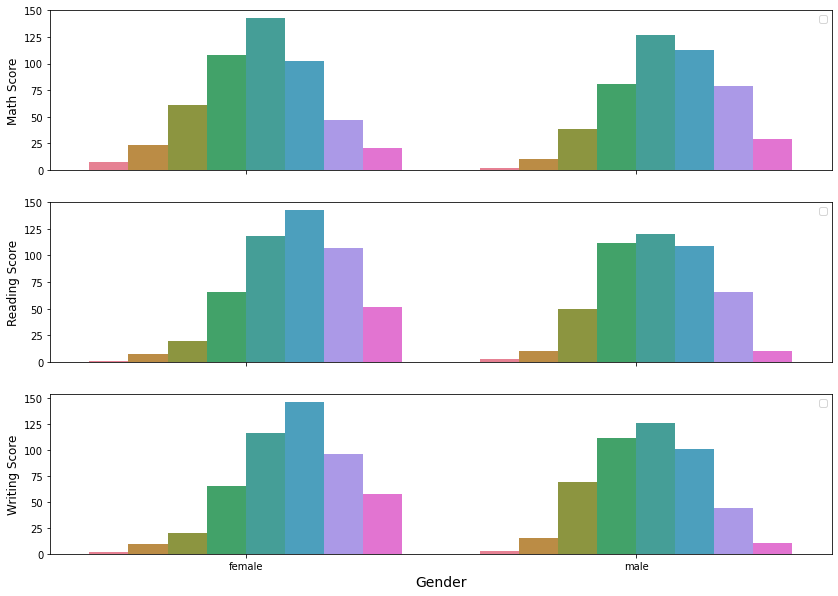

In [8]:
feature = 'gender'
xlabel = 'Gender'
plot_barchart(feature, xlabel)

### 3.2) Ethnicity

I tried looking for what definition of race/ethnicity is being used on the dataset, but couldn’t find it. So it was very tempting to simply drop this column, but instead I plotted the same bar chart just to see how your race can interfere in your results, but it’s a little too random and confusing.

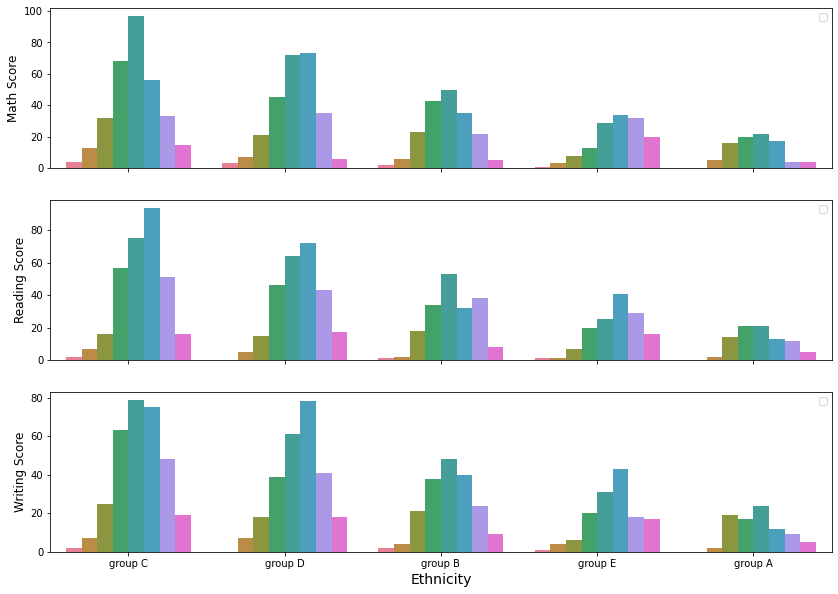

In [9]:
feature = 'ethnicity'
xlabel = 'Ethnicity'
plot_barchart(feature, xlabel)

### 3.3) Parental education

This the most important feature for insights and discussion. The parental level of education is divided into:

- Some high school
- High school
- Some college
- Associate’s degree
- Bachelor’s degree
- Master’s degree

This is the plot that shows the disparity of grades distribution very well, note how the master’s degree have scores way above average, along with the bachelor’s degree group.

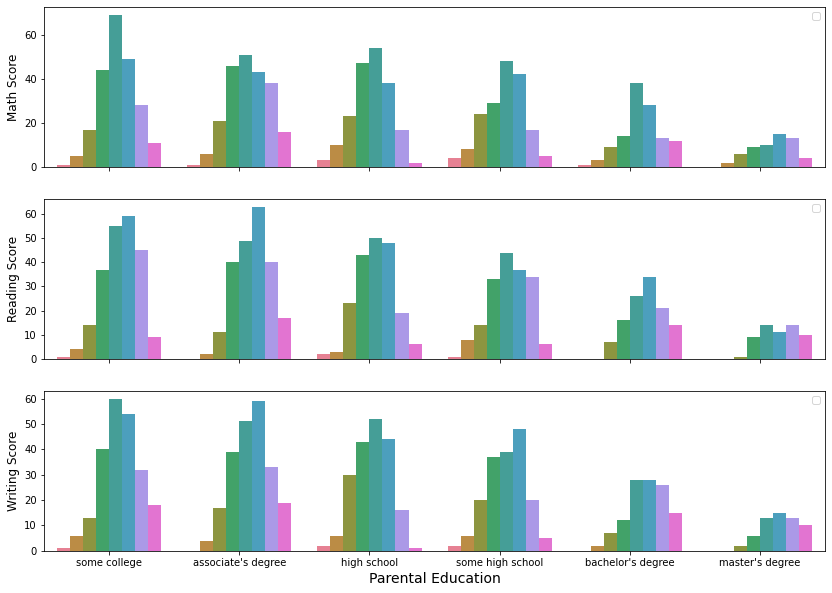

In [10]:
feature = 'parental_education'
xlabel = 'Parental Education'
plot_barchart(feature, xlabel)

### 3.4) Lunch

The lunch is probably directly correlated with the financial situation of the student. Here, we can see a huge performance difference between the two groups, but another possible interpretation is just that eating well during the test may improve your score.

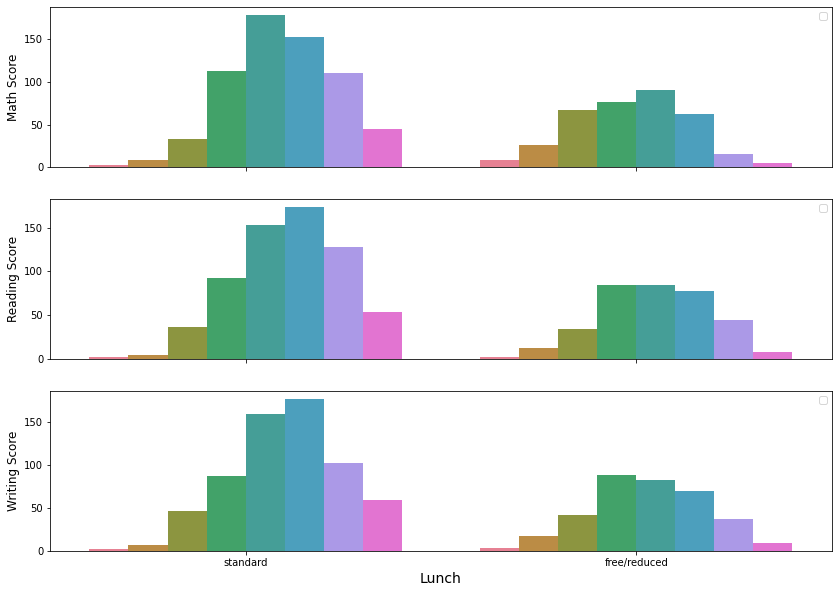

In [11]:
feature = 'lunch'
xlabel = 'Lunch'
plot_barchart(feature, xlabel)

### 3.5) Test preparation

The test preparation feature is the more intuitive one, so our only direct conclusion is that students that have completed the test preparation have higher grades. Though we can clearly recognize that this effect is stronger in writing and reading than in math.

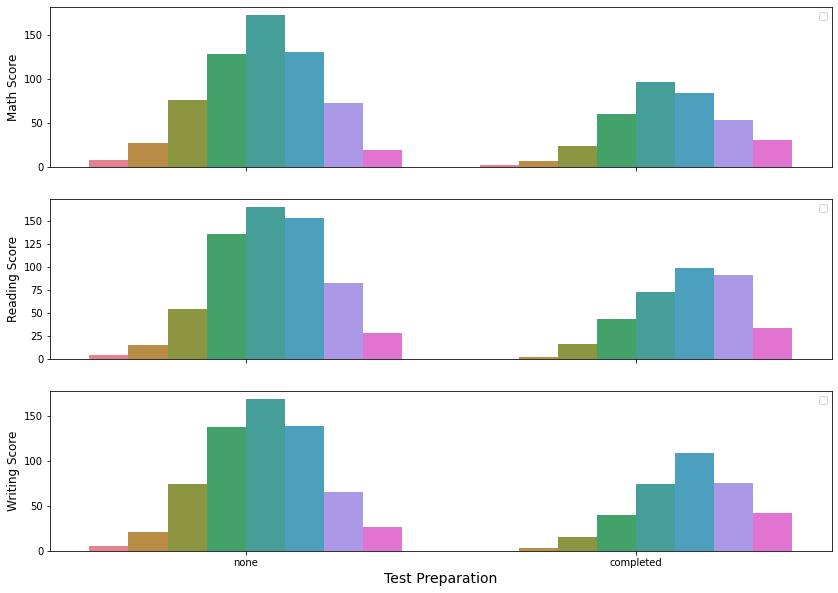

In [12]:
feature = 'test_preparation'
xlabel = 'Test Preparation'
plot_barchart(feature, xlabel)

## 4) Feature relevance and correlation

Just out of curiosity, let's to group all the different student profiles, take out the mean of the scores and sort the resulting dataframe.

In [13]:
db = db_raw.copy()

profiles = []

for ethnicity in db["ethnicity"].unique():
    for parental_education in db["parental_education"].unique():
        for lunch in db["lunch"].unique():
            for test_preparation in db["test_preparation"].unique():
                profiles.append({"ethnicity": ethnicity, 
                    "parental_education": parental_education,
                    "lunch": lunch,
                    "test_preparation": test_preparation})

for i in range(len(profiles)):
    profile = db.loc[(db['ethnicity'] == profiles[i]['ethnicity']) 
        & (db['parental_education'] == profiles[i]['parental_education'])
        & (db['lunch'] == profiles[i]['lunch'])
        & (db['test_preparation'] == profiles[i]['test_preparation'])]
    
    profiles[i]["math_score"] = profile["math_score"].mean()
    profiles[i]["reading_score"] = profile["reading_score"].mean()
    profiles[i]["writing_score"] = profile["writing_score"].mean()
    profiles[i]["mean_score"] = (profile["math_score"].mean() 
        + profile["reading_score"].mean() 
        + profile["writing_score"].mean())/3

In [14]:
df = pd.DataFrame(data=profiles)
df = df.sort_values(by=['mean_score'])
df = df.reset_index().drop("index", axis=1)
df = df.dropna()
df.sort_values('mean_score', ascending=False).head(20)

,ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,mean_score
115,group E,master's degree,standard,completed,91.000000,99.000000,97.500000,95.833333
114,group B,bachelor's degree,free/reduced,completed,87.000000,90.000000,88.000000,88.333333
113,group B,master's degree,standard,none,83.500000,92.500000,88.500000,88.166667
112,group C,some college,standard,completed,77.285714,83.571429,85.071429,81.976190
111,group C,bachelor's degree,standard,completed,77.615385,82.384615,82.769231,80.923077
110,group E,bachelor's degree,free/reduced,completed,80.333333,80.666667,81.333333,80.777778
109,group E,master's degree,standard,none,77.666667,81.666667,81.000000,80.111111
108,group E,bachelor's degree,standard,completed,82.857143,77.571429,79.857143,80.095238
107,group C,master's degree,standard,completed,73.750000,81.000000,81.000000,78.583333
106,group B,associate's degree,standard,completed,75.000000,79.888889,80.444444,78.444444


As we can see, looking at the top of the clusters we have only students with highly educated parents.

Another way of seeing all the features together and how they relate to each other is with the correlation matrix. Luckily, seaborn also provide a correlation matrix function. In the matrix, the closer the absolute value of the correlation is to 1, than more the features relate to each other.

You can find out more about these [here](https://en.wikipedia.org/wiki/Correlation_and_dependence).

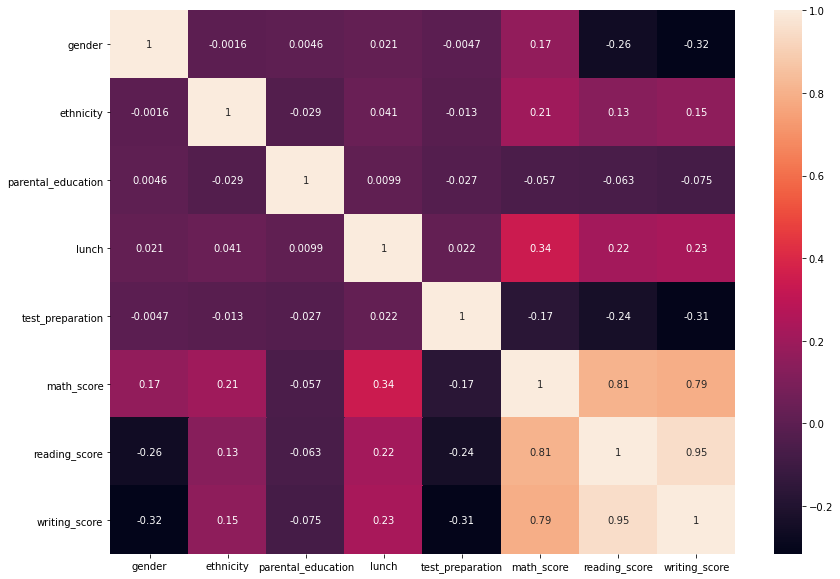

In [15]:
# Feature correlations
db = db_raw.copy()
cat = ['gender', 'ethnicity', 'parental_education', 'lunch', 'test_preparation']

for label in cat:
    db[label] = LabelEncoder().fit_transform(db[label])

corrMatrix = db.corr()
fig = plt.figure(figsize=(14,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

## 5) Final thoughts

In conclusion, it’s clear that the features related to parental education and money are deeply related to the student result on the exams. This is why meritocracy is so debatable when there is no isonomy between all people. A great video exemplifying this (in portuguese) can be watched in this link.

If you liked this “insight project” please let me know in the comments bellow!

Thanks for your time :D